In [12]:
import numpy as np
import sklearn
import autosklearn.classification
from sklearn.metrics import mean_squared_error
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import shutil
import tempfile
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import contextlib

In [13]:
def evaluate(model, X_test_features, y_test):
    y_pred = model.predict(X_test_features)
    accuracy_test = sklearn.metrics.accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"Test Accuracy: {accuracy_test}")
    print(f'Mean Squared Error: {mse:.2f}')

    # Confusion Matrix
    cm = confusion_matrix(y_pred, y_test)
    class_labels = ['NORMAL', 'PNEUMONIA']
    
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix For AutoML - BM3D')
    plt.show()

    # Classification Report
    report = classification_report(y_test, y_pred, target_names=class_labels, zero_division=1)
    print(report)


In [14]:
X_train_features_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/BM3D/X_train_features.npy"
X_val_features_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/BM3D/X_val_features.npy"
X_test_features_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/BM3D/X_test_features.npy"
y_train_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/BM3D/y_train.npy"
y_val_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/BM3D/y_val.npy"
y_test_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/BM3D/y_test.npy"

In [15]:
# load features
X_train_features = np.load(X_train_features_dir)
X_val_features = np.load(X_val_features_dir)
X_test_features = np.load(X_test_features_dir)

y_train = np.load(y_train_dir)
y_val = np.load(y_val_dir)
y_test = np.load(y_test_dir)

### Without Feature Reduction

Validation Accuracy: 0.5
Mean Squared Error: 0.50
Test Accuracy: 0.375
Mean Squared Error: 0.62


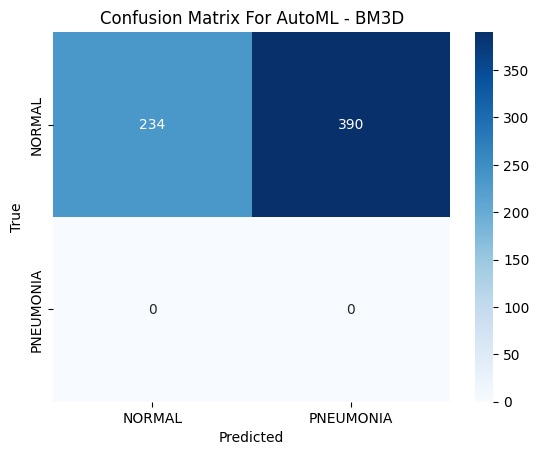

              precision    recall  f1-score   support

      NORMAL       0.38      1.00      0.55       234
   PNEUMONIA       1.00      0.00      0.00       390

    accuracy                           0.38       624
   macro avg       0.69      0.50      0.27       624
weighted avg       0.77      0.38      0.20       624



In [16]:
warnings.simplefilter('ignore')

temp_dir_path = tempfile.mkdtemp()

try:
    # Clean up the temporary directory before running auto-sklearn
    shutil.rmtree(temp_dir_path, ignore_errors=True)

    # Suppress all warnings
    # Redirect all output (stdout and stderr) to /dev/null (Unix) or nul (Windows)
    with open(os.devnull, 'w') as devnull:
        with contextlib.redirect_stdout(devnull), contextlib.redirect_stderr(devnull):
            # Define the auto-sklearn classifier
            automl_classifier = autosklearn.classification.AutoSklearnClassifier(
                seed = 42,
                time_left_for_this_task=300,
                per_run_time_limit=120,
                ensemble_kwargs={'ensemble_size': 5},
                n_jobs=-1,
                tmp_folder=temp_dir_path,
                delete_tmp_folder_after_terminate=False,  
            )

            # Make predictions on the val set
            automl_classifier.fit(X_train_features, y_train)
            y_pred_val = automl_classifier.predict(X_val_features)

    # Evaluate the model on the test set
    accuracy_val = sklearn.metrics.accuracy_score(y_val, y_pred_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    print(f"Validation Accuracy: {accuracy_val}")
    print(f'Mean Squared Error: {mse_val:.2f}')     


    # Evalutaing the model on the test set
    evaluate(automl_classifier, X_test_features, y_test)
            
    # Print the auto-sklearn statistics
    # print(automl_classifier.sprint_statistics())    

finally:
    # Clean up the temporary directory
    shutil.rmtree(temp_dir_path, ignore_errors=True)

### PCA

In [17]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train_features)
scaled_X_val = scaler.transform(X_val_features)
scaled_X_test = scaler.transform(X_test_features)

n_components = 16
pca = PCA(n_components=n_components, random_state=42)

X_train_pca = pca.fit_transform(scaled_X_train)
X_val_pca = pca.fit_transform(scaled_X_val)
X_test_pca = pca.fit_transform(scaled_X_test)

Validation Accuracy: 0.5
Mean Squared Error: 0.50
Test Accuracy: 0.5592948717948718
Mean Squared Error: 0.44


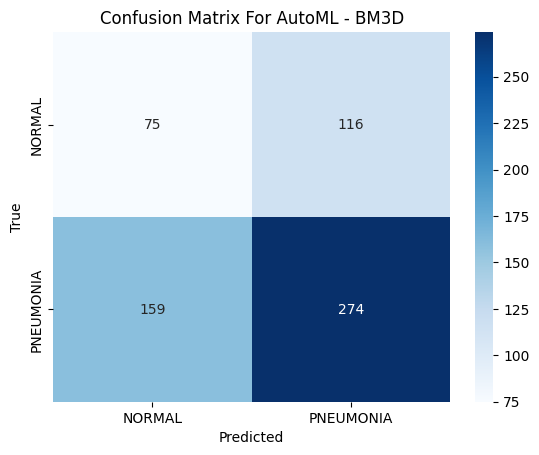

              precision    recall  f1-score   support

      NORMAL       0.39      0.32      0.35       234
   PNEUMONIA       0.63      0.70      0.67       390

    accuracy                           0.56       624
   macro avg       0.51      0.51      0.51       624
weighted avg       0.54      0.56      0.55       624



In [18]:
warnings.simplefilter('ignore')

temp_dir_path = tempfile.mkdtemp()

try:
    # Clean up the temporary directory before running auto-sklearn
    shutil.rmtree(temp_dir_path, ignore_errors=True)

    # Suppress all warnings
    # Redirect all output (stdout and stderr) to /dev/null (Unix) or nul (Windows)
    with open(os.devnull, 'w') as devnull:
        with contextlib.redirect_stdout(devnull), contextlib.redirect_stderr(devnull):
            # Define the auto-sklearn classifier
            automl_classifier = autosklearn.classification.AutoSklearnClassifier(
                seed = 42,
                time_left_for_this_task=300,
                per_run_time_limit=120,
                ensemble_kwargs={'ensemble_size': 5},
                n_jobs=-1,
                tmp_folder=temp_dir_path,
                delete_tmp_folder_after_terminate=False,  
            )

            # Make predictions on the val set
            automl_classifier.fit(X_train_pca, y_train)
            y_pred_val = automl_classifier.predict(X_val_pca)

    # Evaluate the model on the test set
    accuracy_val = sklearn.metrics.accuracy_score(y_val, y_pred_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    print(f"Validation Accuracy: {accuracy_val}")
    print(f'Mean Squared Error: {mse_val:.2f}')     


    # Evalutaing the model on the test set
    evaluate(automl_classifier, X_test_pca, y_test)
            
    # Print the auto-sklearn statistics
    # print(automl_classifier.sprint_statistics())    

finally:
    # Clean up the temporary directory
    shutil.rmtree(temp_dir_path, ignore_errors=True)

### T-SNE

In [19]:
# Fit the scaler on the training data and transform the training, validation, and test sets
X_train_scaled = scaler.fit_transform(X_train_features)
X_val_scaled = scaler.transform(X_val_features)
X_test_scaled = scaler.transform(X_test_features)

# Apply t-SNE to reduce the dimensionality to 2D for scaled data
tsne = TSNE(n_components=2,perplexity=5, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)
X_val_tsne = tsne.fit_transform(X_val_scaled)
X_test_tsne = tsne.fit_transform(X_test_scaled)

Validation Accuracy: 0.5
Mean Squared Error: 0.50
Test Accuracy: 0.5801282051282052
Mean Squared Error: 0.42


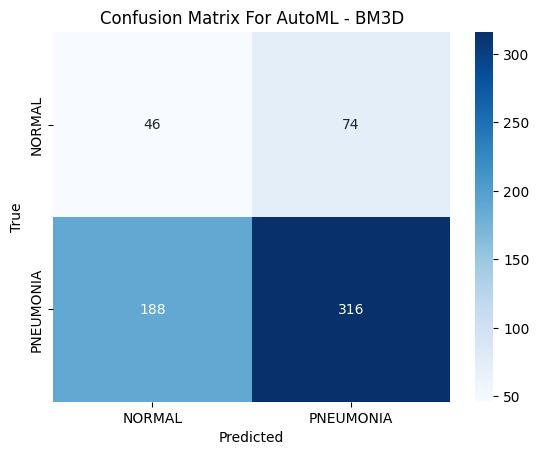

              precision    recall  f1-score   support

      NORMAL       0.38      0.20      0.26       234
   PNEUMONIA       0.63      0.81      0.71       390

    accuracy                           0.58       624
   macro avg       0.51      0.50      0.48       624
weighted avg       0.54      0.58      0.54       624



In [20]:
warnings.simplefilter('ignore')

temp_dir_path = tempfile.mkdtemp()

try:
    # Clean up the temporary directory before running auto-sklearn
    shutil.rmtree(temp_dir_path, ignore_errors=True)

    # Suppress all warnings
    # Redirect all output (stdout and stderr) to /dev/null (Unix) or nul (Windows)
    with open(os.devnull, 'w') as devnull:
        with contextlib.redirect_stdout(devnull), contextlib.redirect_stderr(devnull):
            # Define the auto-sklearn classifier
            automl_classifier = autosklearn.classification.AutoSklearnClassifier(
                seed = 42,
                time_left_for_this_task=300,
                per_run_time_limit=120,
                ensemble_kwargs={'ensemble_size': 5},
                n_jobs=-1,
                tmp_folder=temp_dir_path,
                delete_tmp_folder_after_terminate=False,  
            )

            # Make predictions on the val set
            automl_classifier.fit(X_train_tsne, y_train)
            y_pred_val = automl_classifier.predict(X_val_tsne)

    # Evaluate the model on the test set
    accuracy_val = sklearn.metrics.accuracy_score(y_val, y_pred_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    print(f"Validation Accuracy: {accuracy_val}")
    print(f'Mean Squared Error: {mse_val:.2f}')     


    # Evalutaing the model on the test set
    evaluate(automl_classifier, X_test_tsne, y_test)
            
    # Print the auto-sklearn statistics
    # print(automl_classifier.sprint_statistics())    

finally:
    # Clean up the temporary directory
    shutil.rmtree(temp_dir_path, ignore_errors=True)

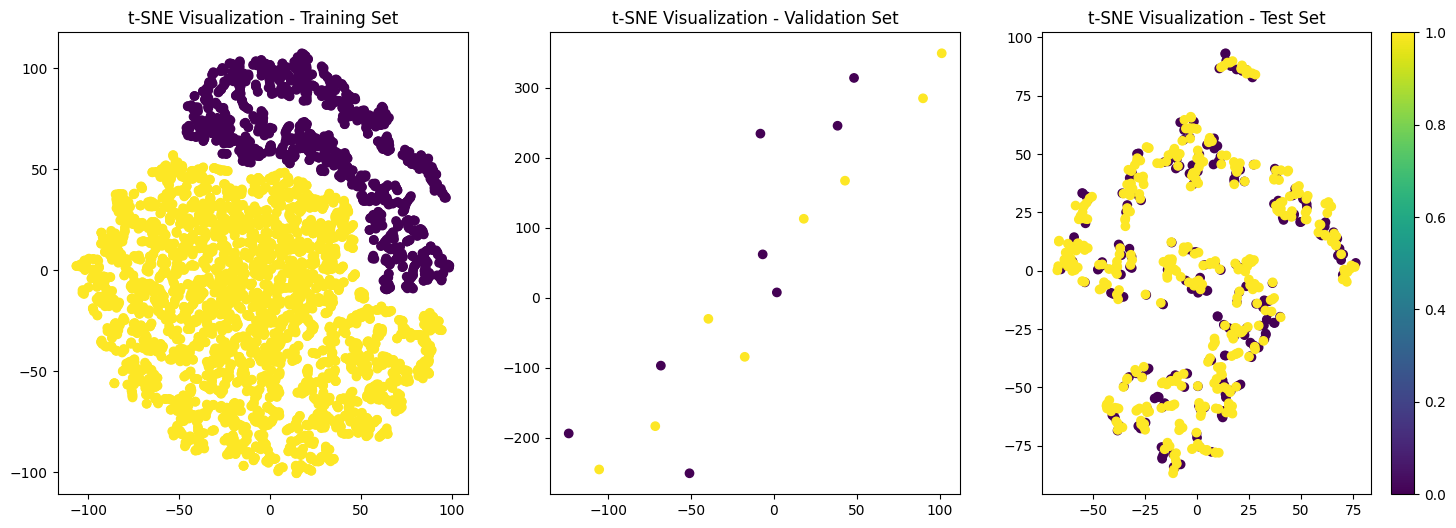

In [21]:
# Create scatter plots for training, validation, and test sets
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis')
plt.title('t-SNE Visualization - Training Set')

plt.subplot(1, 3, 2)
plt.scatter(X_val_tsne[:, 0], X_val_tsne[:, 1], c=y_val, cmap='viridis')
plt.title('t-SNE Visualization - Validation Set')

plt.subplot(1, 3, 3)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=y_test, cmap='viridis')
plt.title('t-SNE Visualization - Test Set')

plt.colorbar()
plt.show()